# 1D heat equation, finite difference, Neumann boundary conditions

_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.linalg import toeplitz
from IPython import display

Let's look at the function
\begin{align}
\frac{\partial u}{\partial t} &= \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}
with boundary conditions
\begin{align}
\label{eq:dirichlet}\left .u\right|_{0} &= B_0 \\
\label{eq:neumann}\left . \frac{\partial u}{\partial x} \right|_{n} &= B_n 
\end{align}

Discretizing the Neumann boundary condition (\ref{eq:neumann}):
\begin{align}\label{eq:neumann2}
\frac{\partial u}{\partial x} &= \frac{u_{n} - u_{n-1}}{\Delta x} = B_n
\end{align}

Discretization of $u$ around $n-1$ gives
\begin{align}\label{eq:neumann3}
\left. \frac{\partial^2 u}{\partial x^2}\right|_{n-1} &= \frac{u_{n-2} - 2u_{n-1} + u_n}{\Delta x^2}
\end{align}

Substituting (\ref{eq:neumann2}) in (\ref{eq:neumann3}) gives:
\begin{align}
u_n &= B_n\Delta x + u_{n-1} \\
\left. \frac{\partial^2 u}{\partial x^2}\right|_{n-1} &= \frac{u_{n-2} - 2u_{n-1} + B_n\Delta x + u_{n-1}}{\Delta x^2} \\
&= \frac{u_{n-2} - u_{n-1} + B_n\Delta x}{\Delta x^2}
\end{align}



Let's discretize the spacial part and write it as a linear system of equations:

\begin{align}
\frac{\partial u}{\partial t} &= A\cdot u + b \\
\frac{\partial u}{\partial t} &= 
\frac{\kappa}{\Delta x^2} \begin{bmatrix}
-2 &  1 &  0 & \cdots &  0 \\
 1 & -2 &  1 & \cdots &  0 \\
 \vdots &    &  \ddots &  & \vdots \\
 0 &      \cdots & 1 & -2 & 1 \\
 0 &     \cdots & 0 & 1 & -1 \\
\end{bmatrix} 
\begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_{n-2} \\
u_{n-1}
\end{bmatrix} +
\begin{bmatrix}
\frac{\kappa}{\Delta x^2}B_0 \\
0 \\
\vdots \\
0 \\
\frac{B_{n}}{\Delta x}
\end{bmatrix}
\end{align}


Now we can solve this system of equations as a normal ODE.

In [3]:
# Constant kappa
k = 0.005

# Spacial domain
n = 100
L = 1
dx = L / n
x = np.linspace(dx, L-dx, n)

# Time steps
T0 = 0.0
Tn = 2.0
t_steps = 1000
dt = (Tn - T0)/t_steps
t = np.linspace(T0, Tn, t_steps)

# Boundary conditions
B0 = 3.0
Bn = 0.0

# Initial condition, u(x,0)=0
Uinit = np.ones(shape=(n,)) * 0.0

# Discretization matrix A
A = toeplitz([-2.0, 1.0] + [0.0]*(n-2))
A[n-1,n-1] = -1
A = k / dx**2 * A

# Vector with boundary conditions b
b = np.zeros(shape=(n))
b[0] = k / dx**2 * B0
b[n-1] = 1/dx * Bn

In [4]:
print(f"CFL = {k * dt / dx**2:0.4f}")

CFL = 0.1000


In [5]:
print("\nA =")
print(A)
print("\nb =")
print(b)


A =
[[-100.   50.    0. ...    0.    0.    0.]
 [  50. -100.   50. ...    0.    0.    0.]
 [   0.   50. -100. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -100.   50.    0.]
 [   0.    0.    0. ...   50. -100.   50.]
 [   0.    0.    0. ...    0.   50.  -50.]]

b =
[150.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [6]:
def fn(u, t, A, b, k, dx):
    return ((k/dx**2)*np.matmul(A, u) + (k/dx**2)*b)

In [7]:
%%time

u = odeint(fn, Uinit, t, args=(A, b, k, dx))

CPU times: user 11.3 s, sys: 12.8 s, total: 24.1 s
Wall time: 683 ms


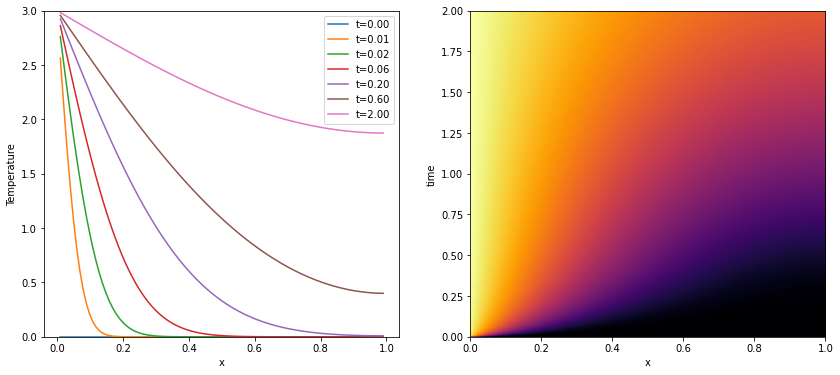

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(0, 3)
axs[0].plot(x, u[0], label=f"t={0 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[3], label=f"t={3 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[10], label=f"t={10 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[30], label=f"t={30 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[100], label=f"t={100 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[300], label=f"t={300 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[999], label=f"t={1000 * Tn/t_steps:0.2f}")
axs[0].legend()
axs[0].set_ylabel("Temperature")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", origin="lower", extent=[0, L, T0, Tn])
axs[1].set_xlabel(f"x")
axs[1].set_ylabel("time")
plt.show()

In [9]:
# Animation of the solution over the integrated time span. 

def animate(frame):
    """ Animation """
    y = u[frame]
    line.set_data((x, y))
    plt.title(f"t={Tn * frame / t_steps:0.2f}")

# Create the plot
fig = plt.figure(figsize=(6, 6))
lines = plt.plot([])
line = lines[0]
plt.xlim([0, L])
plt.ylim([0, 4])
plt.ylabel("Temperature")
plt.xlabel("x")
plt.title("")
  
anim = FuncAnimation(fig, animate, frames=t_steps, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()